In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [25]:
def moving_average(d, extra_periods = 1, n=3):
    #historical period length
    cols = len(d)
    #append np.nan into the demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    #define the forecast array
    f = np.full(cols+extra_periods, np.nan)

    #create all the t+1 forecast untill end of historical period
    for t in range(n, cols):
        f[t] = np.mean(d[t-n:t])

    #forecast for all extra periods
    f[t+1:] = np.mean(d[t-n+1:t+1])

    #return a dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand':d, 'Forecast': f, 'Error': d-f})
    return(df)


In [56]:

d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,19,12]
data = moving_average(d, extra_periods=1)
data


,Demand,Forecast,Error
0,28.0,NaN,NaN
1,19.0,NaN,NaN
2,18.0,NaN,NaN
3,13.0,21.666667,-8.666667
4,19.0,16.666667,2.333333
5,16.0,16.666667,-0.666667
6,19.0,16.000000,3.000000
7,18.0,18.000000,0.000000
8,13.0,17.666667,-4.666667
9,16.0,16.666667,-0.666667


<AxesSubplot:title={'center':'Moving Average'}>

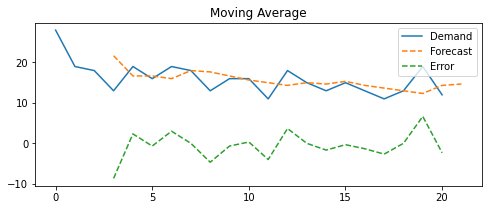

In [61]:
data[['Demand','Forecast','Error']].plot(figsize=(8,3), title = 'Moving Average', style = ['-','--','--'])